<a href="https://colab.research.google.com/github/alok-padhi1/inagri/blob/main/inagri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q scikit-learn joblib pandas

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Crop_recommendation.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Features and target
X = df.drop('label', axis=1)
y = df['label']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

✅ Accuracy: 0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00       

In [ ]:
import pandas as pd

# Custom soil/environment input
sample_data = [[90, 42, 43, 20.5, 82, 6.5, 202]]  # N, P, K, temp, humidity, pH, rainfall
feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
sample_df = pd.DataFrame(sample_data, columns=feature_names)

# Predict
predicted_crop = model.predict(sample_df)[0]
print("🌾 Recommended Crop:", predicted_crop)

🌾 Recommended Crop: rice


In [ ]:
import joblib

# Save model
joblib.dump(model, 'crop_recommendation_model.pkl')

# Download the model
from google.colab import files
files.download('crop_recommendation_model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install joblib

In [ ]:
# Average ideal values per crop (example values, adjust as needed)
crop_ideal_values = {
    'rice':        [90, 42, 43, 20.5, 82, 6.5, 202],
    'maize':       [50, 55, 48, 22, 60, 6.8, 110],
    'chickpea':    [30, 40, 25, 24, 50, 6.4, 80],
    'banana':      [100, 80, 85, 25, 90, 6.7, 220],
    'cotton':      [70, 45, 40, 27, 60, 6.5, 150],
    # Add more crops as needed
}

In [ ]:
import plotly.graph_objects as go

 Accuracy Score: 99.32%

 Classification Report:
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.0

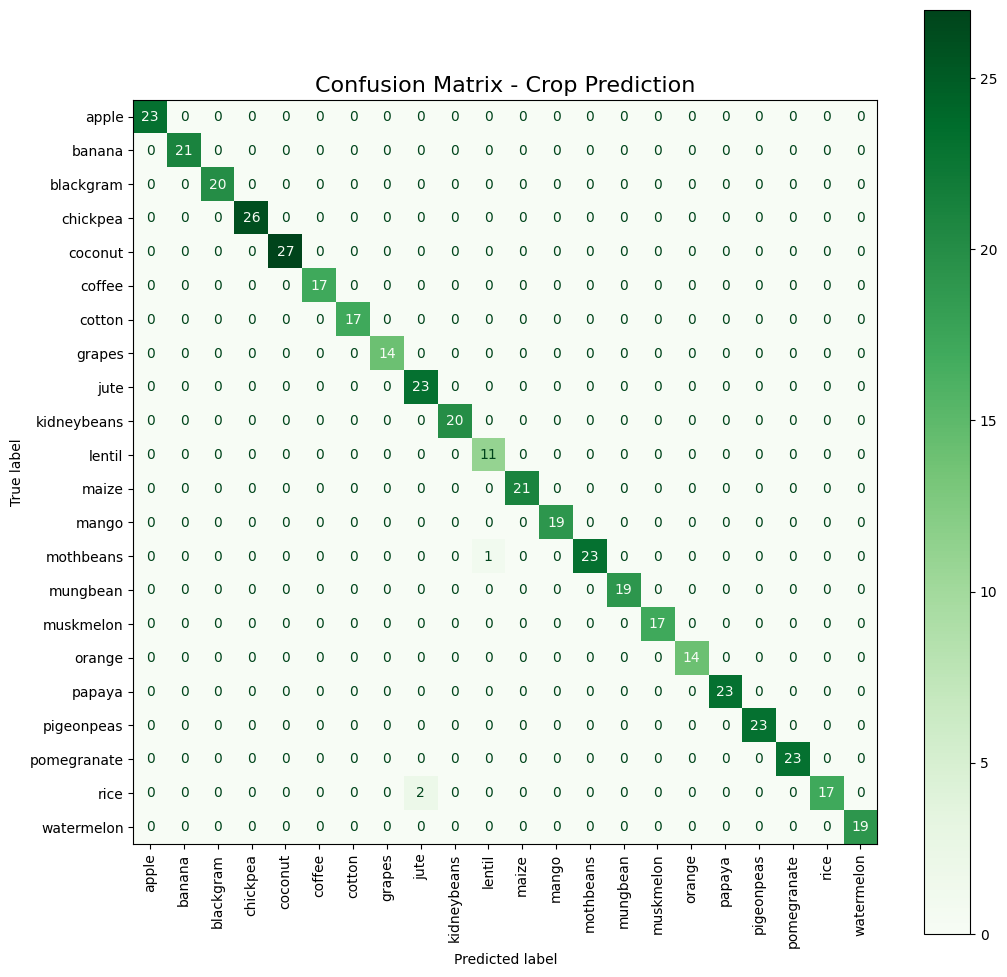

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt # Ensure matplotlib is imported

# Set a standard font family to avoid warnings
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans'] # Or another common font like 'Arial'

# Predict on test set
y_pred = model.predict(X_test)

# 1. Accuracy Score
acc = accuracy_score(y_test, y_pred)
print(f" Accuracy Score: {acc * 100:.2f}%\n")

# 2. Classification Report
print(" Classification Report:")
print(classification_report(y_test, y_pred))

# 3. Confusion Matrix
print(" Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 4. Visual Confusion Matrix (Optional)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(12, 12))
disp.plot(ax=ax, cmap='Greens', xticks_rotation='vertical')
plt.title("Confusion Matrix - Crop Prediction", fontsize=16)
plt.grid(False)

plt.show()

In [ ]:
# 📌 Step 1: Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
)
from ipywidgets import interact, FloatSlider, VBox, Output, Tab, Label, widgets
from IPython.display import display

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans'] # Or another common font like 'Arial'
df = pd.read_csv('Crop_recommendation.csv')
X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 📌 Step 3: Crop Recommendation UI Setup
recommend_out = Output()

# Function to estimate profit
def estimate_profit(crop_names):
    estimates = []
    for crop in crop_names:
        data = crop_cost_profit_data.get(crop.lower())
        if data:
            cost = data['cost_per_acre']
            yield_kg = data['yield_kg']
            price = data['market_price_per_kg']
            revenue = yield_kg * price
            profit = revenue - cost
            estimates.append({
                'Crop': crop.title(),
                'Cost (₹/acre)': cost,
                'Yield (kg/acre)': yield_kg,
                'Market Price (₹/kg)': price,
                'Revenue (₹)': revenue,
                'Net Profit (₹)': profit
            })
        else:
            estimates.append({
                'Crop': crop.title(),
                'Cost (₹/acre)': 'N/A',
                'Yield (kg/acre)': 'N/A',
                'Market Price (₹/kg)': 'N/A',
                'Revenue (₹)': 'N/A',
                'Net Profit (₹)': 'N/A'
            })
    return pd.DataFrame(estimates)

def suggest_crop_rotation(crop_names):
    rotation_data = []
    for crop in crop_names:
        next_crops = crop_rotation_map.get(crop.lower(), ['No data available'])
        rotation_data.append({
            'Current Crop': crop.title(),
            'Recommended Next Crops': ', '.join(next_crops)
        })
    return pd.DataFrame(rotation_data)


def recommend_crop(N, P, K, temperature, humidity, ph, rainfall):
    global top3_crops # Make top3_crops globally available
    sample_data = [[N, P, K, temperature, humidity, ph, rainfall]]
    feature_names = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
    sample_df = pd.DataFrame(sample_data, columns=feature_names)

    probs = model.predict_proba(sample_df)[0]
    crop_labels = model.classes_
    top3_indices = probs.argsort()[-3:][::-1]
    top3_crops = [(crop_labels[i], probs[i]) for i in top3_indices]

    values = sample_df.iloc[0].tolist()
    labels = feature_names

    recommend_out.clear_output()
    with recommend_out:
        print("\n🌿 CROP RECOMMENDATION DASHBOARD 🌿\n")
        print("Top 3 Crop Suggestions based on your soil & weather data:\n")
        for crop, prob in top3_crops:
            print(f"➡️ {crop} ({prob * 100:.2f}%)")

        # Calculate and display estimated profit for top 3 crops using the new function
        print("\n💰 Estimated Profit per Acre (Example Values):\n")
        top3_crop_names = [crop for crop, _ in top3_crops]
        profit_estimates_df = estimate_profit(top3_crop_names)
        display(profit_estimates_df)


        # 📊 Bar Chart
        plt.figure(figsize=(10, 5))
        plt.bar(labels, values, color='mediumseagreen')
        plt.title('📊 Input Feature Values', fontsize=14)
        plt.xlabel('Features')
        plt.ylabel('Values')
        plt.grid(axis='y', linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

        # 🥧 Pie Chart
        crop_names = [crop for crop, _ in top3_crops]
        crop_probs = [prob for _, prob in top3_crops]
        plt.figure(figsize=(6, 6))
        plt.pie(crop_probs, labels=crop_names, autopct='%1.1f%%', startangle=90,
                colors=['#98FB98', '#66CDAA', '#20B2AA'])
        plt.title('🥧 Top 3 Crop Probabilities')
        plt.tight_layout()
        plt.show()

        # 📖 Show Crop Info
        print("\n📚 CROP INFORMATION:\n")
        for crop, _ in top3_crops:
            info = crop_info.get(crop, None)
            print(f"🔹 {crop.title()}:")
            if info:
                for key, value in info.items():
                    print(f"   {key}: {value}")
            else:
                print("   ❗ No information available.")
            print()

        # Display crop rotation suggestions
        print("\n🔄 CROP ROTATION SUGGESTIONS:\n")
        rotation_suggestions_df = suggest_crop_rotation([crop for crop, _ in top3_crops])
        display(rotation_suggestions_df)


        # Radar Chart: Compare user input vs ideal for top crop
        top_crop = top3_crops[0][0]
        if top_crop in crop_ideal_values:
            ideal_vals = crop_ideal_values[top_crop]
            input_vals = values
            categories = labels + [labels[0]]  # for closed loop
            input_vals += [input_vals[0]]
            ideal_vals += [ideal_vals[0]]

            angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
            angles += angles[:1]  # close loop

            fig = plt.figure(figsize=(6, 6))
            ax = fig.add_subplot(111, polar=True)
            ax.plot(angles, input_vals, 'o-', linewidth=2, label='Your Input')
            ax.plot(angles, ideal_vals, 'o-', linewidth=2, label='Ideal for ' + top_crop)
            ax.fill(angles, input_vals, alpha=0.25)
            ax.fill(angles, ideal_vals, alpha=0.25)
            ax.set_thetagrids(np.degrees(angles), categories)
            ax.set_title(f'🌾 Input vs Ideal Values for {top_crop}', fontsize=14)
            ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
            plt.show()
        else:
            print(f"No ideal value data available for {top_crop}")


# Create widgets for input
N = widgets.FloatSlider(value=90, min=0, max=200, step=1, description='Nitrogen (N):')
P = widgets.FloatSlider(value=42, min=0, max=200, step=1, description='Phosphorus (P):')
K = widgets.FloatSlider(value=43, min=0, max=200, step=1, description='Potassium (K):')
temperature = widgets.FloatSlider(value=20.5, min=0, max=50, step=0.1, description='Temperature (°C):')
humidity = widgets.FloatSlider(value=82, min=0, max=100, step=1, description='Humidity (%):')
ph = widgets.FloatSlider(value=6.5, min=0, max=14, step=0.1, description='pH Level:')
rainfall = widgets.FloatSlider(value=202, min=0, max=500, step=1, description='Rainfall (mm):')

# Create a button to run the prediction
button = widgets.Button(description="Get Crop Recommendation")

# Function to be called when button is clicked
def on_button_click(b):
    recommend_crop(N.value, P.value, K.value, temperature.value, humidity.value, ph.value, rainfall.value)

# Link button click to the function
button.on_click(on_button_click)

# Arrange widgets in a vertical box
input_widgets = VBox([N, P, K, temperature, humidity, ph, rainfall, button])

# Display widgets and output
display(input_widgets, recommend_out)

Output()

In [ ]:
# Data for cost and profit estimation per crop (example values per acre)
crop_cost_profit_data = {
    'rice':     {'cost_per_acre': 18000, 'yield_kg': 2500, 'market_price_per_kg': 20},
    'wheat':    {'cost_per_acre': 15000, 'yield_kg': 2800, 'market_price_per_kg': 25},
    'maize':    {'cost_per_acre': 14000, 'yield_kg': 2200, 'market_price_per_kg': 18},
    'sugarcane':{'cost_per_acre': 25000, 'yield_kg': 30000, 'market_price_per_kg': 3},
    'mango':    {'cost_per_acre': 30000, 'yield_kg': 12000, 'market_price_per_kg': 10},
    'banana':   {'cost_per_acre': 20000, 'yield_kg': 18000, 'market_price_per_kg': 6},
    'cotton':   {'cost_per_acre': 16000, 'yield_kg': 1700, 'market_price_per_kg': 60},
}

In [ ]:
# Example crop rotation map (add more as needed)
crop_rotation_map = {
    'rice':     ['wheat', 'mustard', 'chickpea'],
    'wheat':    ['maize', 'mung bean', 'sunflower'],
    'maize':    ['legumes', 'soybean', 'groundnut'],
    'cotton':   ['pulses', 'sorghum', 'gram'],
    'sugarcane':['pulses', 'vegetables', 'barley'],
    'banana':   ['legumes', 'maize'],
    'mango':    ['short-season crops like okra or chili'],
    'gram':     ['sorghum', 'rice'],
    'soybean':  ['wheat', 'barley'],
    'groundnut':['millets', 'maize']
}

In [ ]:
# Data for crop information (add more as needed)
crop_info = {
    'rice': {'Soil Type': 'Clayey, loamy, alluvial', 'Season': 'Kharif (June - October)', 'Irrigation': 'Requires standing water (frequent irrigation)', 'Market Trends': 'High demand in domestic & export markets'},
    'wheat': {'Soil Type': 'Well-drained loamy and clay loam', 'Season': 'Rabi (November - April)', 'Irrigation': '2–3 times per season', 'Market Trends': 'Stable prices, good MSP support'},
    'maize': {'Soil Type': 'Fertile, well-drained sandy loam', 'Season': 'Kharif / Rabi', 'Irrigation': 'Needs moderate irrigation', 'Market Trends': 'Used for food & feed; prices vary'},
    'banana': {'Soil Type': 'Rich, well-drained loamy soil', 'Season': 'All year (tropical crop)', 'Irrigation': 'Weekly irrigation essential', 'Market Trends': 'Good profit margins in urban markets'},
    'mango': {'Soil Type': 'Red loamy, alluvial', 'Season': 'Summer (flowering in Jan–Feb, harvesting May–June)', 'Irrigation': 'Moderate, avoid waterlogging', 'Market Trends': 'Seasonal spikes in prices'},
    # Added information for other top crops
    'wheat': {'Soil Type': 'Well-drained loamy and clay loam', 'Season': 'Rabi (November - April)', 'Irrigation': '2–3 times per season', 'Market Trends': 'Stable prices, good MSP support'},
    'maize': {'Soil Type': 'Fertile, well-drained sandy loam', 'Season': 'Kharif / Rabi', 'Irrigation': 'Needs moderate irrigation', 'Market Trends': 'Used for food & feed; prices vary'},
}

,Current Crop,Recommended Next Crops
0,Rice,"wheat, mustard, chickpea"
1,Jute,No data available
2,Papaya,No data available


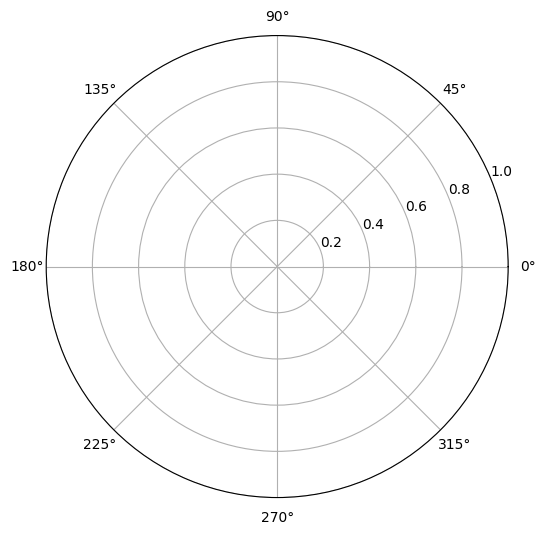

In [ ]:
# Call recommend_crop with some example values to populate top3_crops
recommend_crop(90, 42, 43, 20.5, 82, 6.5, 202)

# Extract crop names from the top3_crops list of tuples
top_crops = [crop for crop, prob in top3_crops]
rotation_df = suggest_crop_rotation(top_crops)
rotation_df.style.set_properties(**{'text-align': 'left'})